In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns=None
pd.options.display.max_rows=None
pd.options.display.float_format='{:6f}'.format
from sklearn.model_selection import train_test_split
import statsmodels
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

# import various function from sklearn
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
# import function to perform feature selection
from sklearn.feature_selection import RFE

In [2]:
plt.rcParams['figure.figsize']=[15,8]

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
data=pd.read_csv('~/Downloads/loan_prediction.csv')

In [5]:
# Top five rows of the data
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.000000,NaN,360.000000,1.000000,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.000000,128.000000,360.000000,1.000000,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.000000,66.000000,360.000000,1.000000,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.000000,120.000000,360.000000,1.000000,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.000000,141.000000,360.000000,1.000000,Urban,Y


In [6]:
# Checking the data shape
print('No of Rows in the data:',data.shape[0])
print('No of Columns in the data:',data.shape[1])

No of Rows in the data: 614
No of Columns in the data: 13


In [7]:
# Checking the data Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
# 5 Point Summary
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.000000,564.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,85.587325,65.120410,0.364878
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.000000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,168.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [9]:
# Checking for null value of the data
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
# Percentage of null values
data.isnull().sum()*100/len(data)

Loan_ID             0.000000
Gender              2.117264
Married             0.488599
Dependents          2.442997
Education           0.000000
Self_Employed       5.211726
ApplicantIncome     0.000000
CoapplicantIncome   0.000000
LoanAmount          3.583062
Loan_Amount_Term    2.280130
Credit_History      8.143322
Property_Area       0.000000
Loan_Status         0.000000
dtype: float64

# Univariate Analysis


In [11]:
num_cols=data.select_dtypes(include=np.number).columns
num_cols

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

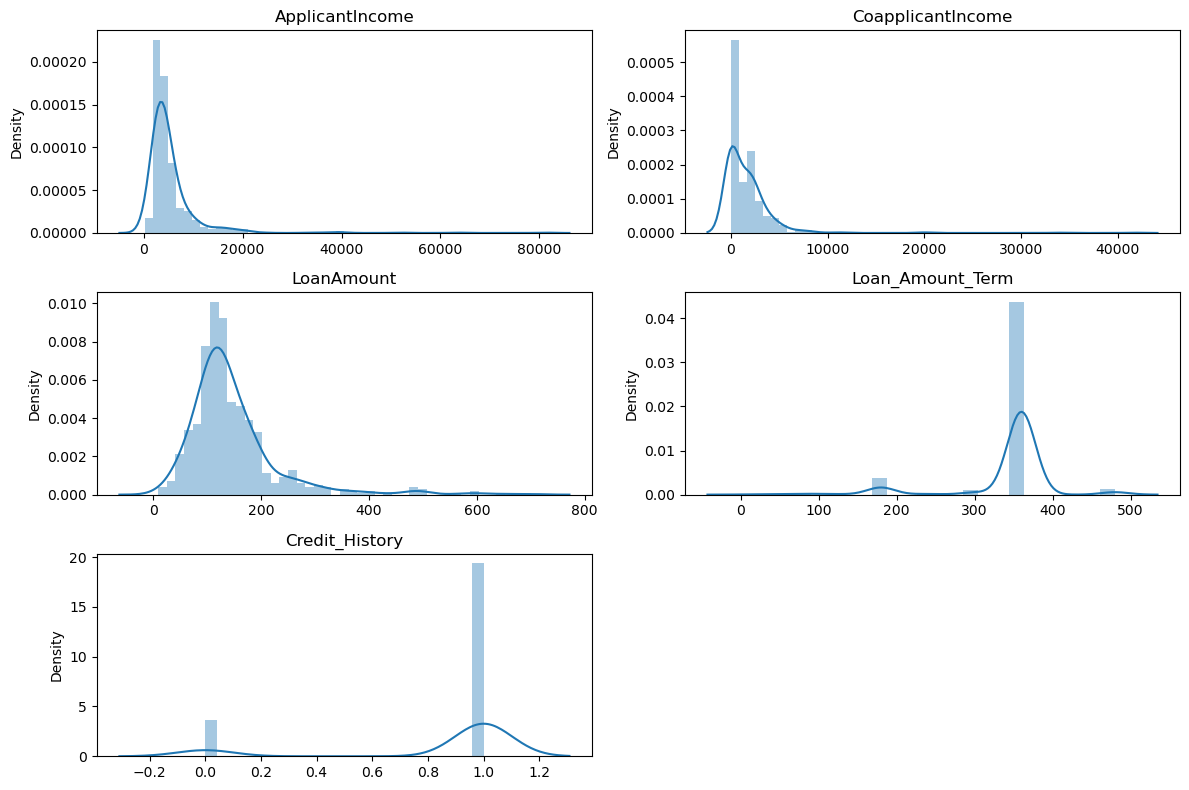

In [12]:
plt.rcParams['figure.figsize']=(12,8)
t=1
for i in num_cols:
    plt.subplot(3,2,t)
    sns.distplot(x=data[i])
    t=t+1
    plt.title(i)
plt.tight_layout()    

In [13]:
# Removing Irrelevant Columns
data.drop('Loan_ID',axis=1,inplace=True)

In [14]:
cat_cols=data.select_dtypes(include=object).columns
cat_cols

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

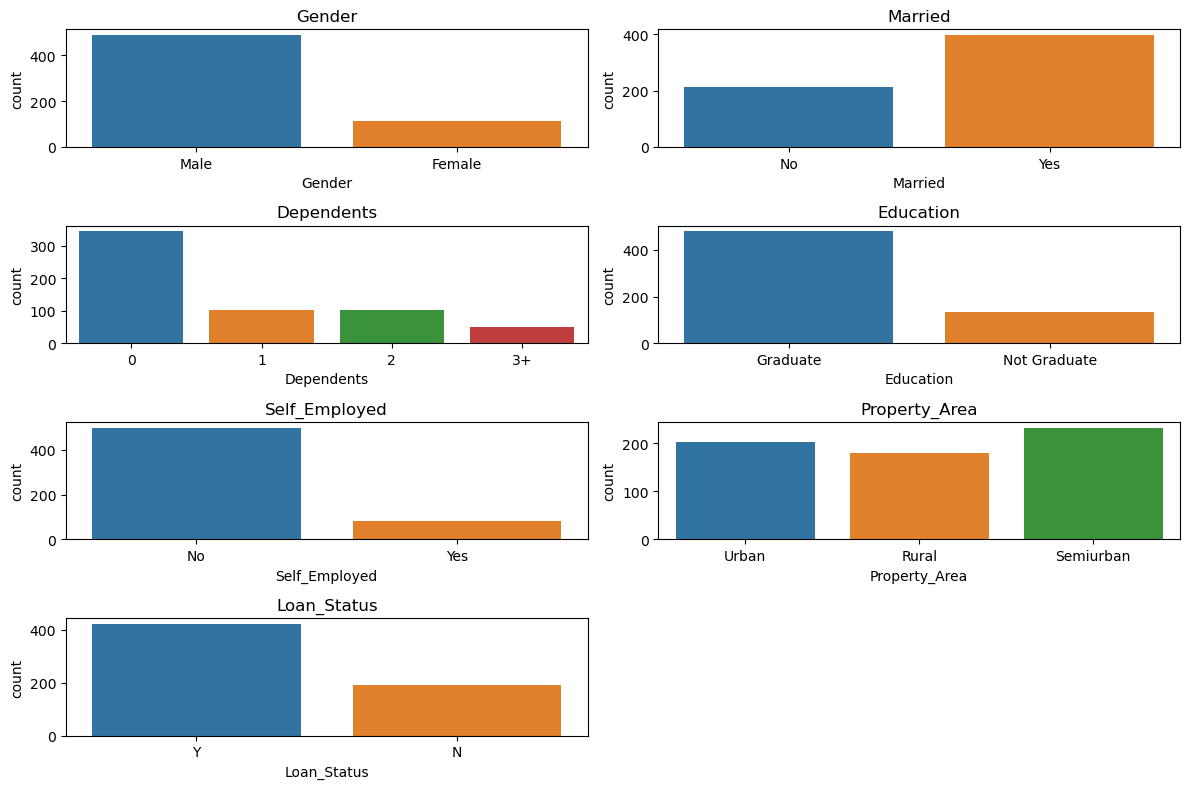

In [15]:
t=1
for i in cat_cols:
    plt.subplot(4,2,t)
    sns.countplot(x=data[i])
    t=t+1
    plt.title(i)
plt.tight_layout()

In [16]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.000000,NaN,360.000000,1.000000,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.000000,128.000000,360.000000,1.000000,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.000000,66.000000,360.000000,1.000000,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.000000,120.000000,360.000000,1.000000,Urban,Y
4,Male,No,0,Graduate,No,6000,0.000000,141.000000,360.000000,1.000000,Urban,Y


In [17]:
cols=['Gender','Married','LoanAmount','Loan_Amount_Term','Dependents']

In [18]:
# Null value treatment 
data=data.dropna(subset=cols)

In [19]:
data['Self_Employed']=data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

In [20]:
data['Credit_History']=data['Credit_History'].fillna(data['Credit_History'].mode()[0])

# handling the Categorical Variable


In [21]:
data.sample(5)


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
214,Male,Yes,0,Graduate,No,3173,3021.000000,137.000000,360.000000,1.000000,Urban,Y
593,Male,Yes,0,Graduate,No,3859,3300.000000,142.000000,180.000000,1.000000,Rural,Y
450,Male,Yes,2,Not Graduate,No,2309,1255.000000,125.000000,360.000000,0.000000,Rural,N
340,Male,Yes,3+,Not Graduate,No,2647,1587.000000,173.000000,360.000000,1.000000,Rural,N
178,Male,Yes,1,Graduate,No,3750,0.000000,116.000000,360.000000,1.000000,Semiurban,Y


In [22]:
data['Dependents'] = data['Dependents'].replace(to_replace='3+',value='4')

In [23]:
data['Gender']=data['Gender'].map({'Male':1,'Female':0}).astype(int)

In [24]:
data['Education'] = data['Education'].map({'Graduate':1,'Not Graduate':0}).astype(int)
data['Self_Employed'] = data['Self_Employed'].map({'Yes':1,'No':0}).astype(int)
data['Married'] = data['Married'].map({'Yes':1,'No':0}).astype(int)
data['Property_Area'] = data['Property_Area'].map({'Urban':0,'Rural':1,'Semiurban':2}).astype(int)
data['Loan_Status'] = data['Loan_Status'].map({'Y':0,'N':1}).astype(int)

In [25]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.000000,128.000000,360.000000,1.000000,1,1
2,1,1,0,1,1,3000,0.000000,66.000000,360.000000,1.000000,0,0
3,1,1,0,0,0,2583,2358.000000,120.000000,360.000000,1.000000,0,0
4,1,0,0,1,0,6000,0.000000,141.000000,360.000000,1.000000,0,0
5,1,1,2,1,1,5417,4196.000000,267.000000,360.000000,1.000000,0,0


In [26]:
X=data.drop('Loan_Status',axis=1)
y=data['Loan_Status']

In [27]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,1,0,4583,1508.000000,128.000000,360.000000,1.000000,1
2,1,1,0,1,1,3000,0.000000,66.000000,360.000000,1.000000,0
3,1,1,0,0,0,2583,2358.000000,120.000000,360.000000,1.000000,0
4,1,0,0,1,0,6000,0.000000,141.000000,360.000000,1.000000,0
5,1,1,2,1,1,5417,4196.000000,267.000000,360.000000,1.000000,0


In [28]:
cols=['ApplicantIncome','CoapplicantIncome','LoanAmount','LoanAmount']

In [29]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [30]:
X[cols]=sc.fit_transform(X[cols])

In [31]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,1,0,-0.128694,-0.049699,-0.214368,360.000000,1.000000,1
2,1,1,0,1,1,-0.394296,-0.545638,-0.952675,360.000000,1.000000,0
3,1,1,0,0,0,-0.464262,0.229842,-0.309634,360.000000,1.000000,0
4,1,0,0,1,0,0.109057,-0.545638,-0.059562,360.000000,1.000000,0
5,1,1,2,1,1,0.011239,0.834309,1.440866,360.000000,1.000000,0


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [33]:
model_df={}

def model_val(model,X,y):
    
    xtrain,xtest,ytrain,ytest=train_test_split(X,y, test_size=0.20,random_state=42)
    model.fit(xtrain,ytrain)
    y_pred=model.predict(xtest)
    print(f"{model}accuracy is {accuracy_score(ytest,y_pred)}")
    score=cross_val_score(model,X,y,cv=5)
    print(f"{model} Avg cross val score is {np.mean(score)}")
    model_df[model]=round(np.mean(score)*100,2)

In [34]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model_val(model,X,y)

LogisticRegression()accuracy is 0.8018018018018018
LogisticRegression() Avg cross val score is 0.8011629811629811


# Decision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model_val(model,X,y)

DecisionTreeClassifier()accuracy is 0.7567567567567568
DecisionTreeClassifier() Avg cross val score is 0.7215724815724815


In [36]:
model_df

{LogisticRegression(): 80.12, DecisionTreeClassifier(): 72.16}

In [37]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model_val(model,X,y)

RandomForestClassifier()accuracy is 0.7747747747747747
RandomForestClassifier() Avg cross val score is 0.7884848484848485


In [38]:
model_df

{LogisticRegression(): 80.12,
 DecisionTreeClassifier(): 72.16,
 RandomForestClassifier(): 78.85}

# Gradient Boosting

In [39]:
from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier()
model_val(model,X,y)

GradientBoostingClassifier()accuracy is 0.7837837837837838
GradientBoostingClassifier() Avg cross val score is 0.7721867321867322


In [40]:
model_df

{LogisticRegression(): 80.12,
 DecisionTreeClassifier(): 72.16,
 RandomForestClassifier(): 78.85,
 GradientBoostingClassifier(): 77.22}

# RandomForest classification

In [41]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model_val(model,X,y)

RandomForestClassifier()accuracy is 0.7837837837837838
RandomForestClassifier() Avg cross val score is 0.7885176085176084


# Adaboost

In [42]:
from sklearn.ensemble import AdaBoostClassifier
model=AdaBoostClassifier()
model_val(model,X,y)

AdaBoostClassifier()accuracy is 0.8108108108108109
AdaBoostClassifier() Avg cross val score is 0.7885012285012285
